In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [42]:
df = pd.read_csv("sleep_3000.csv")
label = df["Sleep Disorder"]
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df = df.drop("Person ID",axis = 1)
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,39,Lawyer,5.9,8,60,7,Normal,130/85,68,8000,None
1,Female,39,Accountant,6.0,6,60,4,Overweight,115/75,78,7000,None
2,Female,35,Engineer,5.9,7,80,8,Normal,120/80,65,8000,None
3,Female,48,Engineer,6.0,8,30,8,Normal,125/80,65,7000,None
4,Male,28,Doctor,7.7,5,90,6,Normal,_RARE_,70,8000,None


# **Exploratory Data Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 640x480 with 0 Axes>

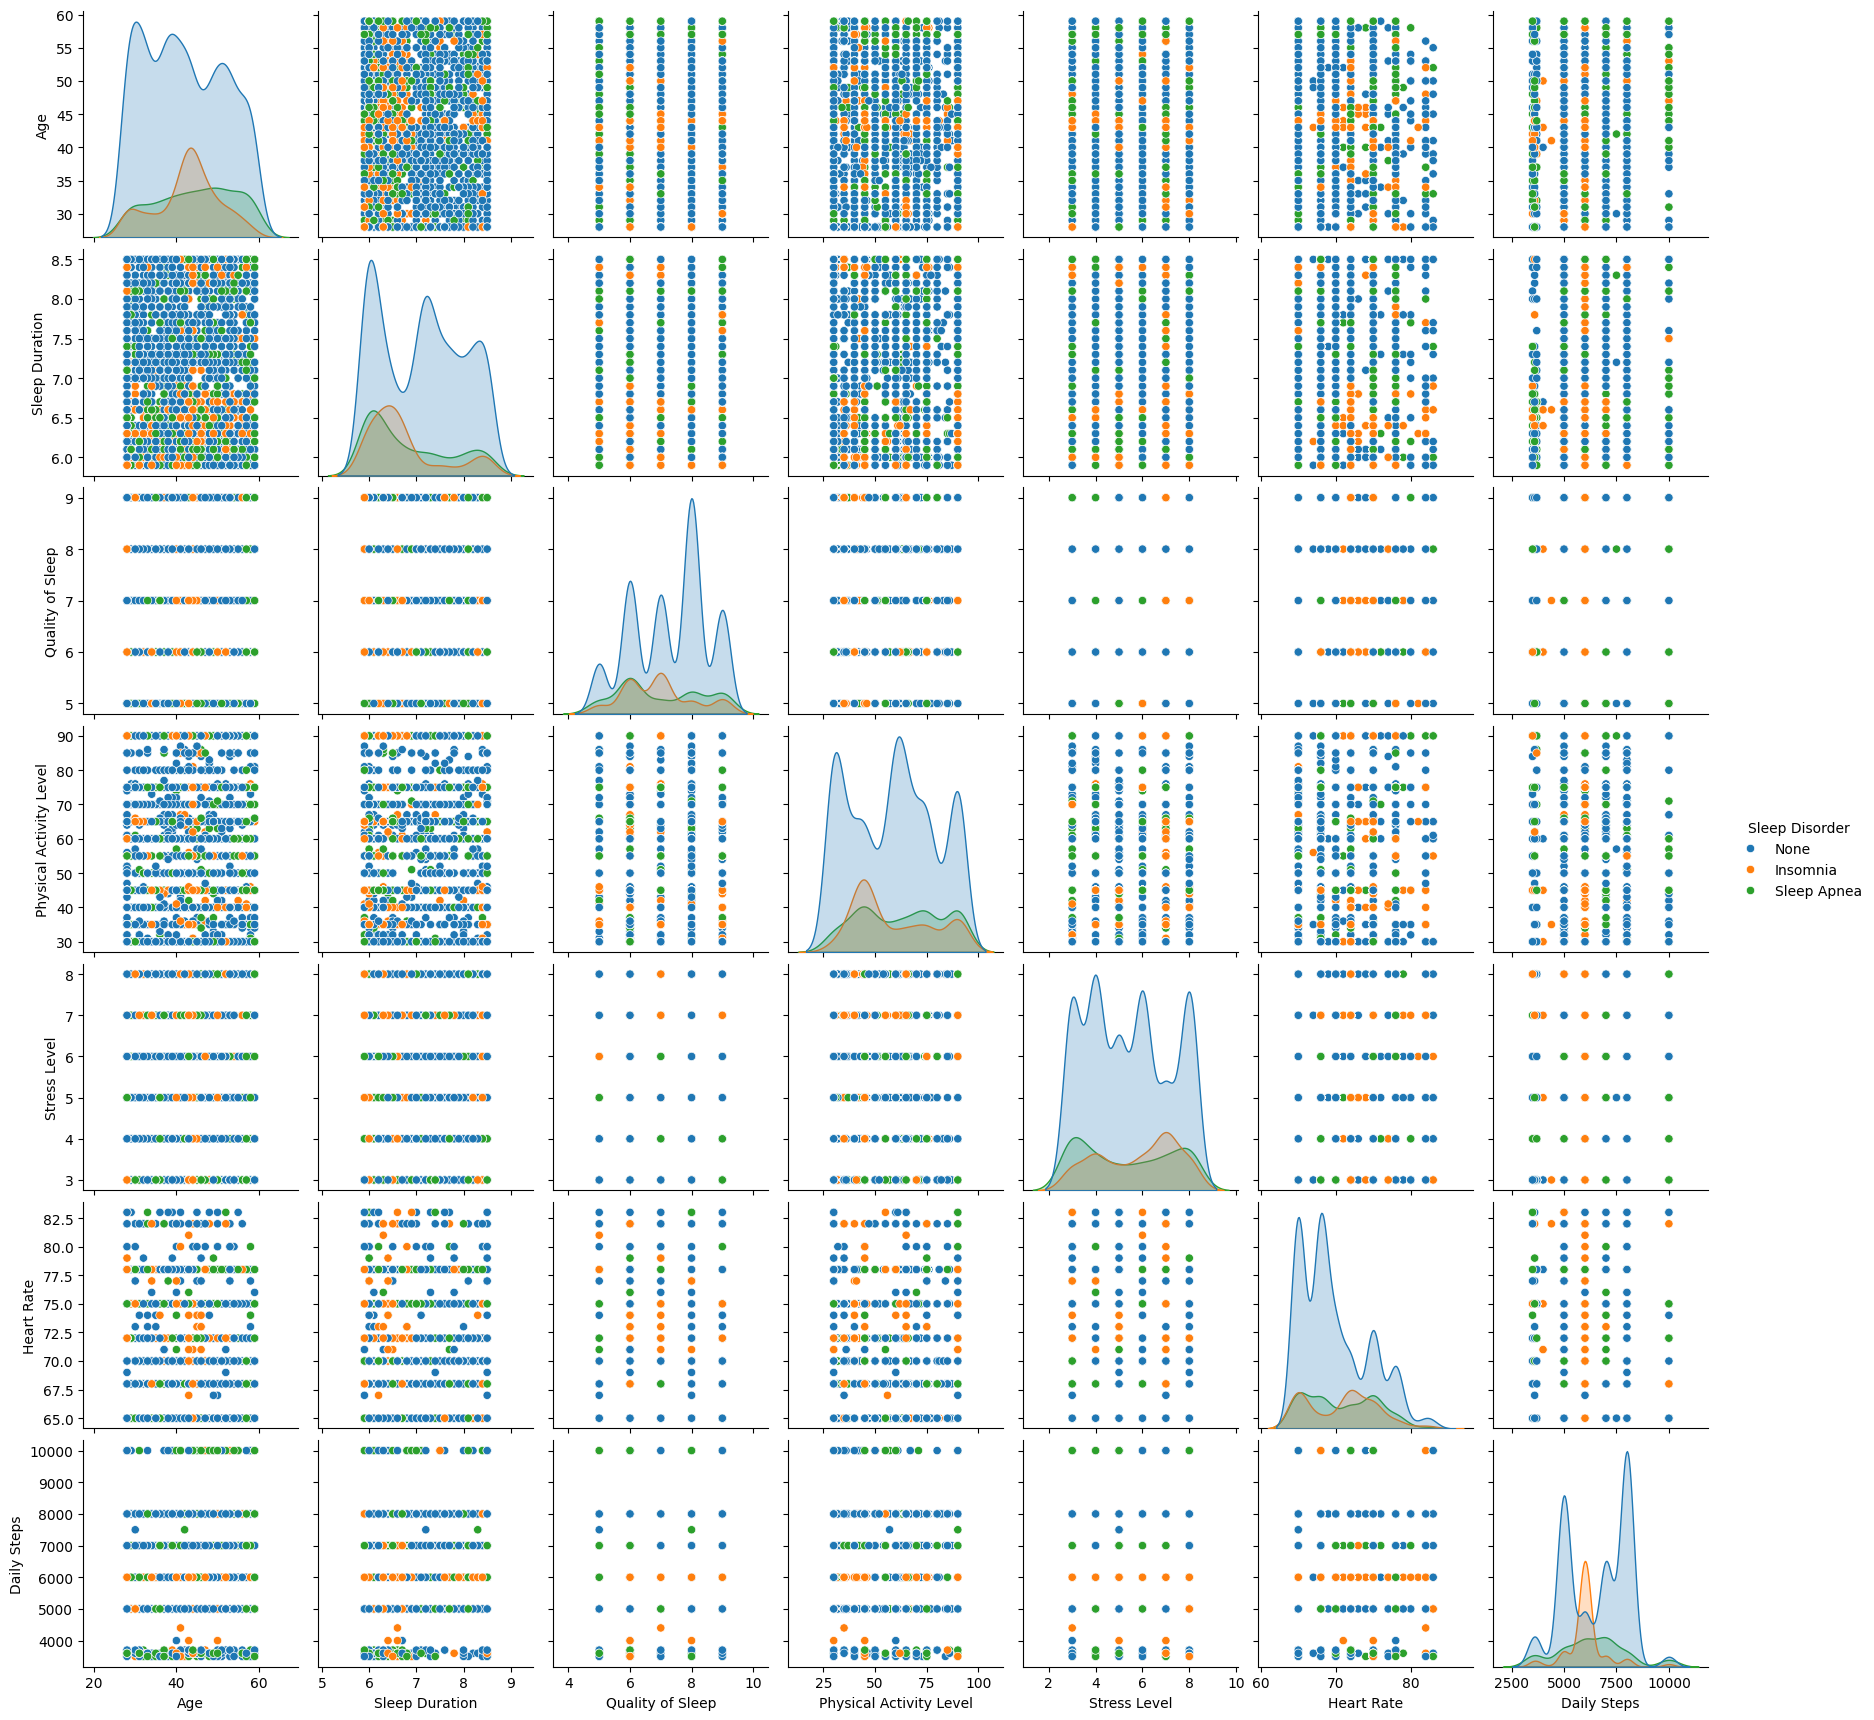

In [43]:
plt.figure()
sns.pairplot(df,hue="Sleep Disorder")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

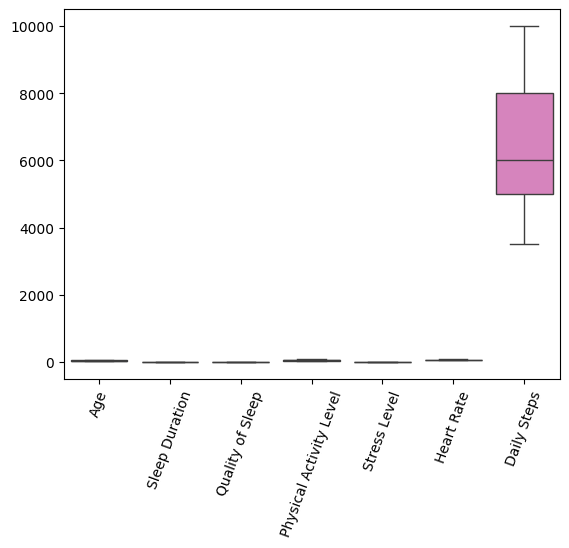

In [44]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

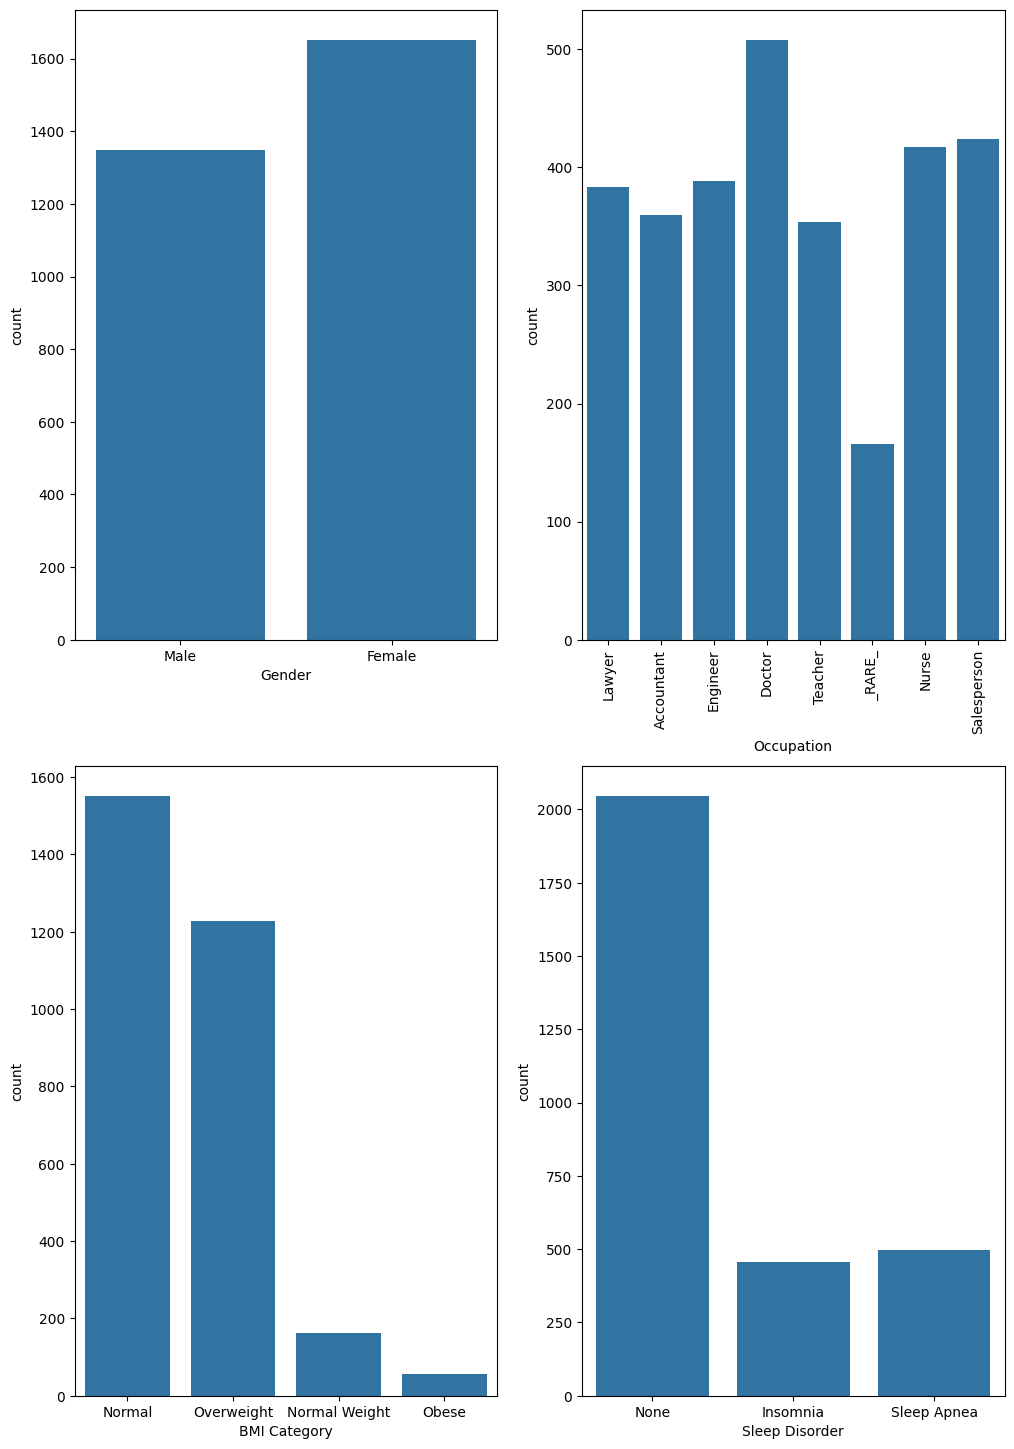

In [45]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category')

plt.subplot(2,2,4)
sns.countplot(df,x='Sleep Disorder')

plt.show()

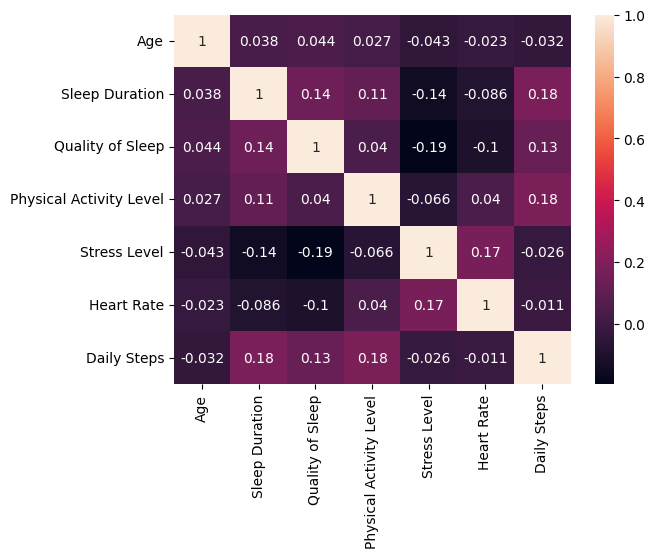

In [46]:
plt.figure()
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True);
plt.show()

# **Data Preprocessing**

In [47]:
print(df.isna().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [48]:
df.duplicated().sum()

0

In [49]:
df = df.drop_duplicates()
df = df.reset_index()

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe()

,index,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,42.526000,7.017333,7.197000,59.496333,5.440667,70.093667,6447.466667
std,866.169729,9.397984,0.873552,1.232084,20.216401,1.777507,4.554610,1457.136918
min,0.000000,28.000000,5.900000,5.000000,30.000000,3.000000,65.000000,3500.000000
25%,749.750000,34.000000,6.200000,6.000000,45.000000,4.000000,65.000000,5000.000000
50%,1499.500000,43.000000,7.000000,7.000000,60.000000,5.000000,68.000000,6000.000000
75%,2249.250000,50.000000,7.800000,8.000000,75.000000,7.000000,75.000000,8000.000000
max,2999.000000,59.000000,8.500000,9.000000,90.000000,8.000000,83.000000,10000.000000


In [52]:
from sklearn.preprocessing import StandardScaler
numerical_features = ["Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","Heart Rate","Daily Steps"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.describe()

,index,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,1499.500000,-3.659295e-16,1.515825e-16,-5.447494e-17,6.276461e-17,-2.155313e-16,5.925630e-16,2.865856e-16
std,866.169729,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,0.000000,-1.545908e+00,-1.279282e+00,-1.783455e+00,-1.459273e+00,-1.373313e+00,-1.118540e+00,-2.023117e+00
25%,749.750000,-9.073671e-01,-9.357991e-01,-9.716868e-01,-7.171776e-01,-8.106334e-01,-1.118540e+00,-9.935291e-01
50%,1499.500000,5.044476e-02,-1.984566e-02,-1.599184e-01,2.491792e-02,-2.479540e-01,-4.597574e-01,-3.071374e-01
75%,2249.250000,7.954095e-01,8.961078e-01,6.518501e-01,7.670134e-01,8.774046e-01,1.077403e+00,1.065646e+00
max,2999.000000,1.753221e+00,1.697567e+00,1.463619e+00,1.509109e+00,1.440084e+00,2.834158e+00,2.438429e+00


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

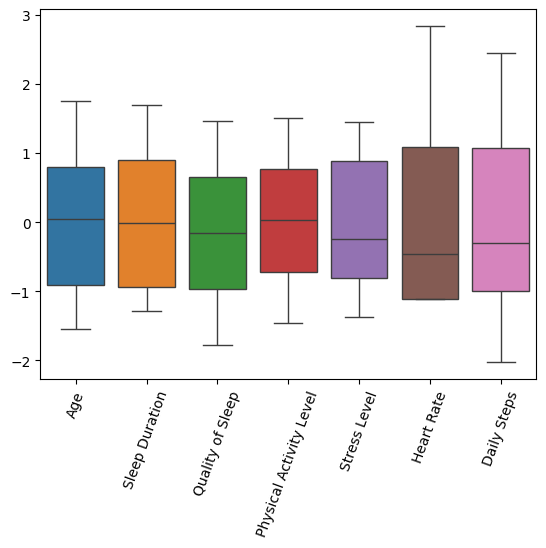

In [54]:
df = df.drop("index",axis = 1)
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

In [56]:
categorical_columns = ["Gender","Occupation","Blood Pressure","BMI Category"]
le = LabelEncoder()
for column in categorical_columns:
  df[column] = le.fit_transform(df[column])

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,-0.375249,3,-1.279282,0.651850,0.024918,0.877405,0,3,-0.459757,1.065646,None
1,0,-0.375249,0,-1.164787,-0.971687,0.024918,-0.810633,3,0,1.736186,0.379254,None
2,0,-0.800944,2,-1.279282,-0.159918,1.014379,1.440084,0,1,-1.118540,1.065646,None
3,0,0.582562,2,-1.164787,0.651850,-1.459273,1.440084,0,2,-1.118540,0.379254,None
4,1,-1.545908,1,0.781614,-1.783455,1.509109,0.314725,0,6,-0.020569,1.065646,None


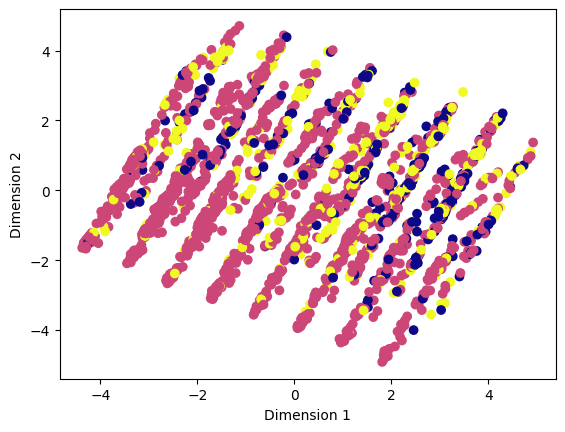

In [69]:
from sklearn.decomposition import PCA
X = df.drop('Sleep Disorder', axis=1)
y = df["Sleep Disorder"]
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
y = le.fit_transform(y)

plt.figure()
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y,cmap="plasma")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# **Model Training**

In [71]:
from imblearn.over_sampling import SMOTE  # Class imabalance handling
# label=label.tolist()
y = df["Sleep Disorder"]
X = df.drop("Sleep Disorder",axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_forest = forest.predict(X_test)
print("forest: ",accuracy_score(y_test,y_forest))

forest:  0.745


In [ ]:
label = label.fillna("None")
data=df.drop(columns=["Sleep Disorder","Blood Pressure"])
encod = LabelEncoder()
categories=["Gender","Occupation","BMI Category"]
for i in categories:
  data[i] = encod.fit_transform(data[i])
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,1,1,27,9,6.1,6,42,6,3,77,4200
1,2,1,28,1,6.2,6,60,8,0,75,10000
2,3,1,28,1,6.2,6,60,8,0,75,10000
3,4,1,28,6,5.9,4,30,8,2,85,3000
4,5,1,28,6,5.9,4,30,8,2,85,3000


In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
y_forest = forest.predict(x_test)
print("forest: ",accuracy_score(y_test,y_forest))

forest:  0.88
